In [2]:
import numpy as np
import pandas as pd
from scipy.special import factorial
import plotnine as p9
from scipy.stats import norm

plot_path = '/Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/'
font_size = 10

In [51]:
def factorial(n):
    return np.prod(np.array([n - i for i in range(n)]))

def log_factorial(n):
    return np.sum(np.log(np.array([n - i for i in range(n)])))

def rising_factorial(x, n):
    return np.prod(np.array([x + i for i in range(n)]))

def log_rising_factorial(x, n):
    return np.sum(np.log(np.array([x + i for i in range(n)])))

In [52]:
n = 5
[n - i for i in range(n)]

[5, 4, 3, 2, 1]

In [53]:
# See https://www.cs.cmu.edu/~kbe/dp_tutorial.pdf, slide 16.

def partition_prob(counts, alpha = 1):
    k = np.shape(counts)[0] # number of distinct clusters/profiles
    N = np.sum(counts) # total number of observations/participants
    return (alpha**k)*np.prod([factorial(c - 1) for c in counts])/rising_factorial(alpha, N)

In [54]:
def log_partition_prob(counts, alpha = 1):
    k = np.shape(counts)[0] # number of distinct clusters/profiles
    N = np.sum(counts) # total number of observations/participants
    return k*np.log(alpha) + np.sum([log_factorial(c - 1) for c in counts]) - log_rising_factorial(alpha, N)

   # profiles  $p(z_{1:n})$ (log-scale)
0           1                      -8.5
1           2                   -3476.9
2           3                   -5212.1
3           4                   -6080.5
4           5                   -6515.3


/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/p(z) by number of profiles


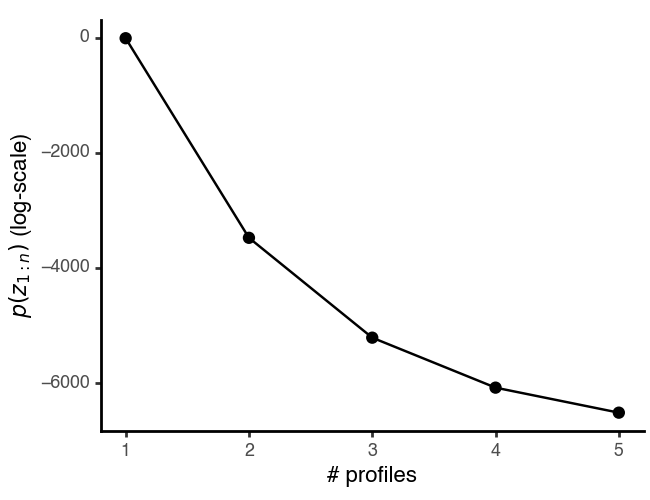

<Figure Size: (325 x 250)>

In [71]:
figure_size = (3.25, 2.5)

counts_list = [np.array([5000]), 
               np.array([2500, 2500]),
               np.array([2500, 1250, 1250]),
               np.array([2500, 1250, 625, 625]),
               np.array([2500, 1250, 625, 313, 312])]
    
plot_df = pd.DataFrame({'# profiles': [1, 2, 3, 4, 5], '$p(z_{1:n})$ (log-scale)': 5*[0.0]})
for i in range(5):
    plot_df.loc[plot_df['# profiles'] == i + 1, '$p(z_{1:n})$ (log-scale)'] = np.round(log_partition_prob(counts_list[i], alpha = 1), 1)
print(plot_df)
plot = p9.ggplot(plot_df, p9.aes(x = '# profiles', y = '$p(z_{1:n})$ (log-scale)'))
plot += p9.geom_point()
plot += p9.geom_line()
plot += p9.theme_classic(base_size = font_size)
plot += p9.theme(figure_size = figure_size)
plot.save(plot_path + 'p(z) by number of profiles', dpi = 300)
plot

In [56]:
np.sum([log_factorial(c - 1) for c in counts_list[2]])

32379.07616331216

In [57]:
np.sum(np.array([2500, 1250, 625, 313, 312]))

5000

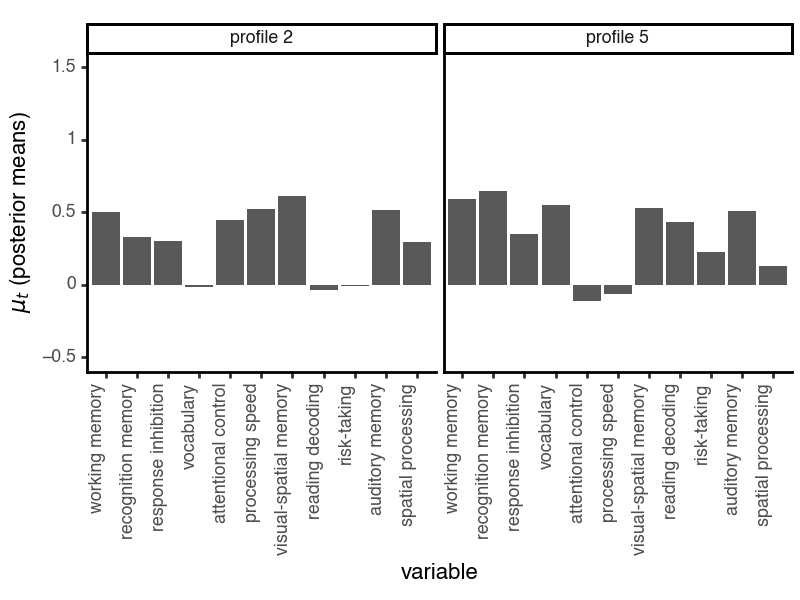

<Figure Size: (400 x 300)>

In [14]:
# mean vectors (mu) of the two most similar profiles from conventional LPA with 20 profiles
# the two most similar profiles were profile 2 and profile 5
figure_size = [4, 3]
font_size = 8

nice_x_names = pd.Series({'two_back': 'working memory',
                          'recog_dprime': 'recognition memory',
                          'neg_ssrt': 'response inhibition',
                          'picvocab': 'vocabulary',
                          'flanker': 'attentional control',
                          'pattern': 'processing speed',
                          'picture': 'visual-spatial memory',
                          'reading': 'reading decoding',
                          'dice': 'risk-taking',
                          'ravlt': 'auditory memory',
                          'little_man': 'spatial processing'})

sim_df = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/most_similar_profiles.csv')
sim_df.columns = ['variable', 'mu5', 'mu2']
x_names = nice_x_names[sim_df['variable'].values]
x_names = pd.Categorical(x_names, categories = list(nice_x_names.values), ordered = True)
m = x_names.shape[0]

plot_df = pd.DataFrame({'mu': np.concatenate([sim_df['mu5'].values, sim_df['mu2'].values]),
                        'profile': m*['profile ' + str(5)] + m*['profile ' + str(2)], 
                        'variable': pd.Categorical(2*list(x_names), categories = x_names, ordered = True)})
plot = p9.ggplot(plot_df, p9.aes(x = 'variable', y = 'mu')) + p9.geom_bar(stat = 'identity')
plot += p9.scales.ylim([-0.5, 1.5])
plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size, axis_text_x = p9.element_text(rotation = 90, hjust = 1))
plot += p9.facet_wrap('profile', scales = 'free_x', ncol = 2)
plot += p9.ylab('$\\mu_t$ (posterior means)')
#plot.save(plot_path + 'conventional LPA (20 profile) most similar profiles', dpi = 300)
plot

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 4 x 7 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/conventional LPA (4 profile) profile means


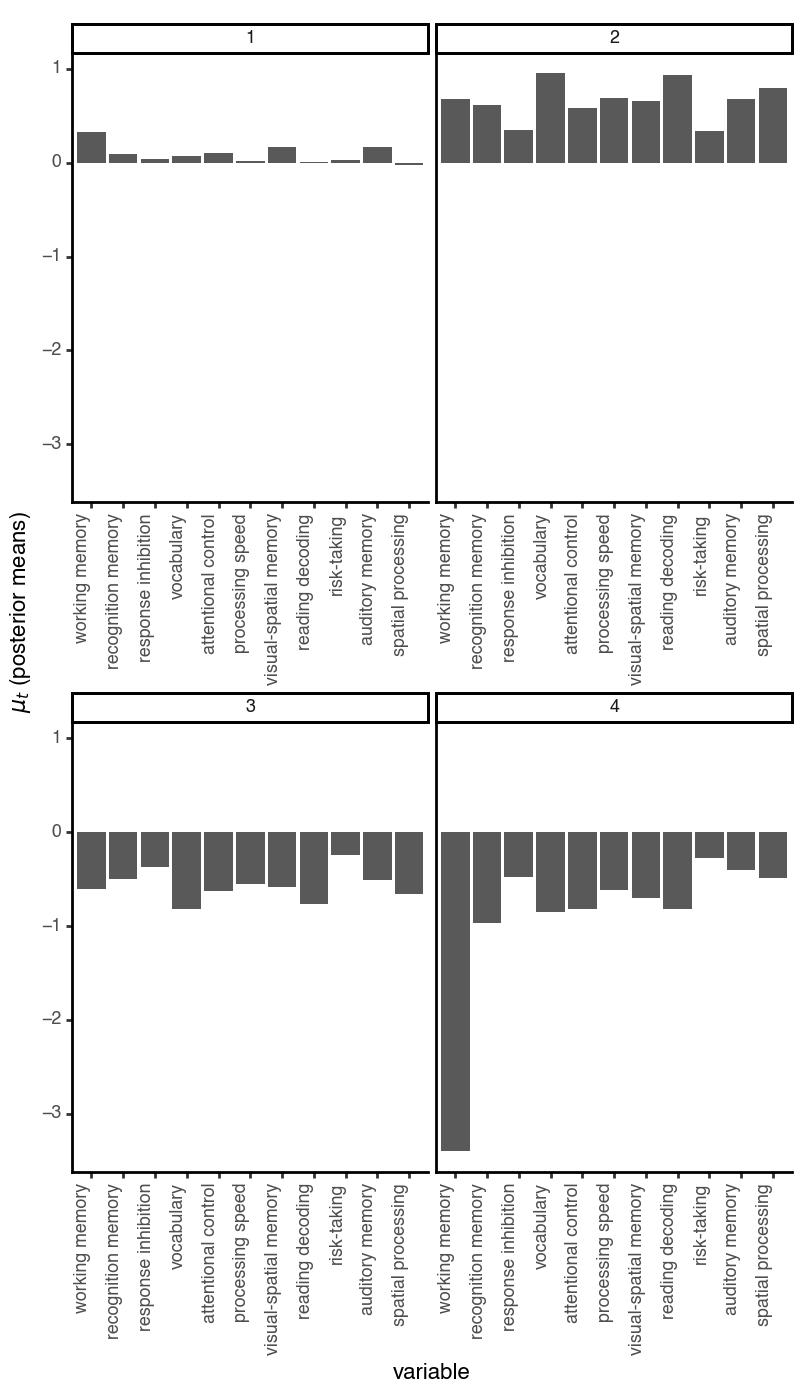

<Figure Size: (400 x 700)>

In [16]:
# profile means of the 4 profile conventional LPA model

clpa_means = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/conventional 4 profile LPA means.csv')
x_names = nice_x_names[clpa_means['variable'].values]
clpa_means['variable'] = pd.Categorical(x_names, categories = list(nice_x_names.values), ordered = True)

plot = p9.ggplot(clpa_means, p9.aes(x = 'variable', y = 'mu')) + p9.geom_bar(stat = 'identity')
plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = [4, 7], axis_text_x = p9.element_text(rotation = 90, hjust = 1))
plot += p9.facet_wrap('profile', scales = 'free_x', ncol = 2)
plot += p9.ylab('$\\mu_t$ (posterior means)')
plot.save(plot_path + 'conventional LPA (4 profile) profile means', dpi = 300)
plot

In [4]:
# import fits stats from conventional LPA fits
fit_stats = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/conventional LPA fit stats.csv',
                        index_col = 0)
fit_stats = fit_stats.rename(columns = {'Classes': '# profiles', 'Entropy': 'entropy reduction'})
fit_stats

,Model,# profiles,AIC,BIC,entropy reduction,prob_min,prob_max,n_min,n_max,BLRT_p,log-likelihood
1,1,1,158018.17,158162.54,1.00,1.00,1.00,1.00,1.00,NaN,-78987.083186
2,1,2,151970.99,152194.11,0.75,0.88,0.95,0.34,0.66,0.01,-73470.850817
3,1,3,150232.47,150534.34,0.76,0.86,0.90,0.07,0.47,0.01,-71717.001183
4,1,4,148852.79,149233.42,0.78,0.78,0.95,0.02,0.59,0.01,-70448.885195
5,1,5,148550.88,149010.26,0.68,0.61,0.94,0.02,0.41,0.01,-69501.383593
6,1,6,148013.71,148551.84,0.69,0.63,0.96,0.02,0.36,0.01,-68721.227168
7,1,7,147805.70,148422.58,0.71,0.56,0.95,0.01,0.46,0.01,-68359.949904
8,1,8,147516.45,148212.08,0.69,0.61,0.96,0.01,0.38,0.01,-67707.121763
9,1,9,147301.03,148075.41,0.70,0.57,0.95,0.01,0.42,0.01,-67280.942058
10,1,10,147063.32,147916.45,0.70,0.58,0.96,0.01,0.38,0.01,-66916.755829


/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/entropy reduction by n profiles


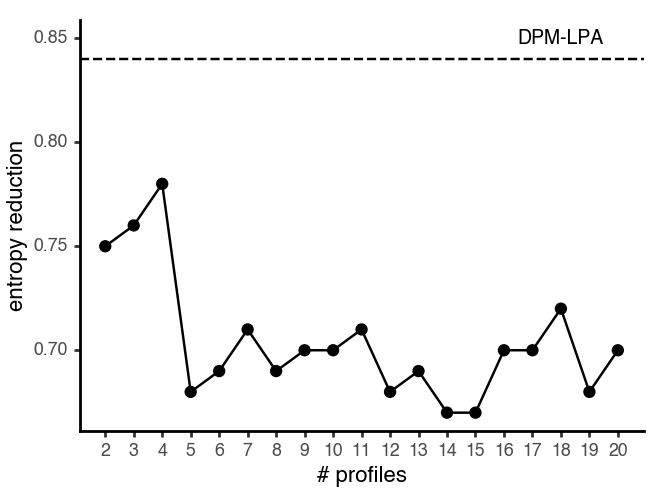

<Figure Size: (325 x 250)>

In [5]:
# relative entropy reduction by number of profiles
figure_size = (3.25, 2.5)

plot_entred = p9.ggplot(fit_stats.loc[fit_stats['# profiles'] > 1, :], p9.aes(x = '# profiles', y = 'entropy reduction')) + p9.geom_point() + p9.geom_line()
plot_entred += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)
plot_entred += p9.geom_hline(yintercept = 0.84, linetype = 'dashed')
plot_entred += p9.scale_x_continuous(breaks = range(1, 21))
plot_entred += p9.annotate('text', x = 18, y = 0.85, 
                         label = 'DPM-LPA',
                         size = font_size - 1)
plot_entred.save(plot_path + 'entropy reduction by n profiles', dpi = 300)
plot_entred

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/AIC and BIC by n profiles


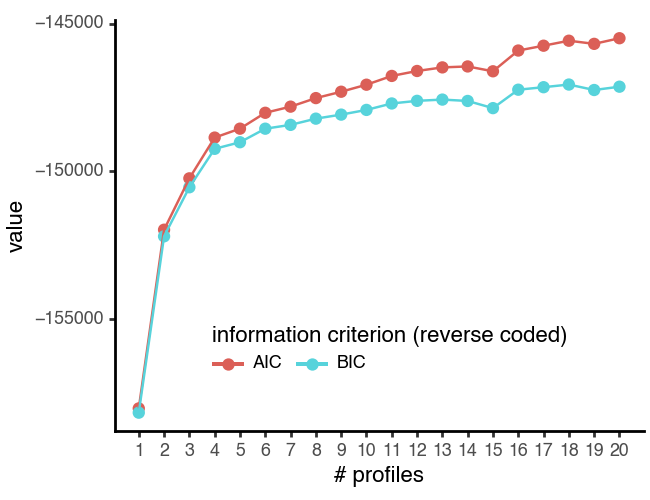

<Figure Size: (325 x 250)>

In [119]:
# AIC and BIC by number of profiles
plot_df = pd.DataFrame({'# profiles': 2*list(np.arange(1, 21)),
                        'information criterion (reverse coded)': 20*['AIC'] + 20*['BIC'],
                        'value': 0.0})
plot_df['value'] = np.concatenate([-fit_stats['AIC'].values, -fit_stats['BIC'].values])

plot_aic_bic = p9.ggplot(plot_df, p9.aes(x = '# profiles', y = 'value', color = 'information criterion (reverse coded)'))
plot_aic_bic += p9.geom_point()
plot_aic_bic += p9.geom_line()
plot_aic_bic += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size, legend_position = [0.6, 0.3])
plot_aic_bic += p9.scale_x_continuous(breaks = range(21))
plot_aic_bic.save(plot_path + 'AIC and BIC by n profiles', dpi = 300)
plot_aic_bic

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/min distance by n profiles


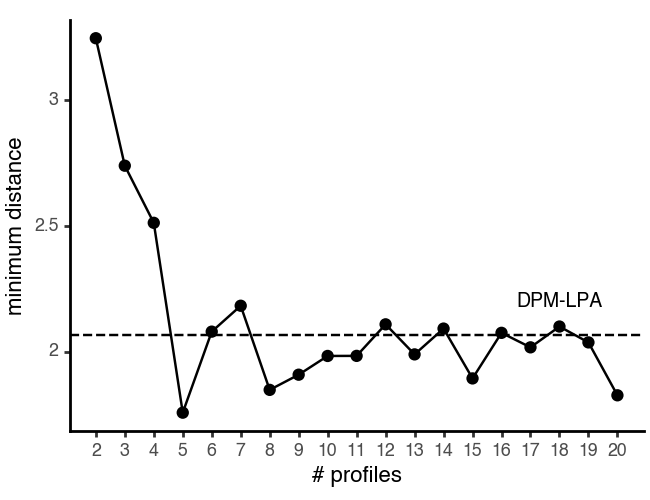

<Figure Size: (325 x 250)>

In [107]:
# min profile distance by number of profiles
sim_by_profiles = pd.read_csv('/Users/sampaskewitz/Documents/ABCD model fitting/conventional LPA fitting/conventional LPA similarity results by n profiles.csv',
                              index_col = 0)
sim_by_profiles = sim_by_profiles.rename(columns = {'n_profiles': '# profiles'})

plot_min = p9.ggplot(sim_by_profiles, p9.aes(x = '# profiles', y = 'minimum distance')) + p9.geom_point() + p9.geom_line()
plot_min += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)
plot_min += p9.geom_hline(yintercept = 2.06528082, linetype = 'dashed')
plot_min += p9.annotate('text', x = 18, y = 2.2, 
                        label = 'DPM-LPA',
                        size = font_size - 1)
plot_min += p9.scale_x_continuous(breaks = range(1, 21))
plot_min.save(plot_path + 'min distance by n profiles', dpi = 300)
plot_min

/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 3.25 x 2.5 in image.
/Users/sampaskewitz/miniconda3/envs/abcd/lib/python3.11/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /Users/sampaskewitz/Dropbox/SamP-Arielle/ABCD Fingerprint/figures for paper/mean distance by n profiles


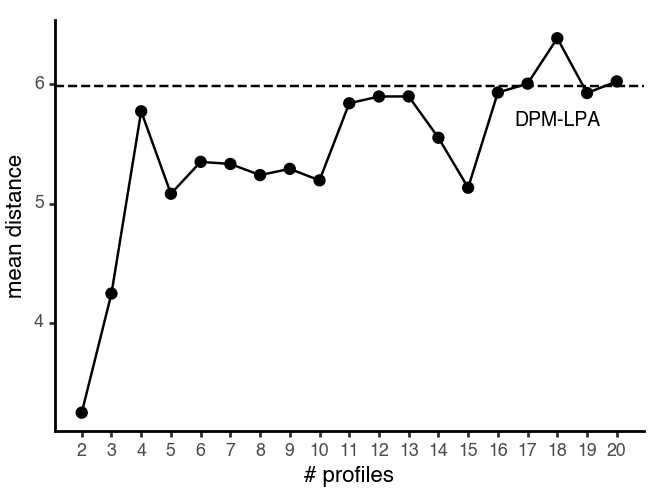

<Figure Size: (325 x 250)>

In [129]:
# mean profile distance by number of profiles

plot_mean = p9.ggplot(sim_by_profiles, p9.aes(x = '# profiles', y = 'mean distance')) + p9.geom_point() + p9.geom_line()
plot_mean += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)
plot_mean += p9.geom_hline(yintercept = 5.98958423, linetype = 'dashed')
plot_mean += p9.annotate('text', x = 18, y = 5.7, 
                        label = 'DPM-LPA',
                        size = font_size - 1)
plot_mean += p9.scale_x_continuous(breaks = range(1, 21))
plot_mean.save(plot_path + 'mean distance by n profiles', dpi = 300)
plot_mean

In [125]:
sim_by_profiles

,# profiles,mean similarity,max similarity,mean distance,minimum distance
1,2,0.005134,0.005134,3.247107,3.247107
2,3,0.008060,0.023426,4.245831,2.740047
3,4,0.008399,0.042547,5.773606,2.512822
4,5,0.026637,0.213390,5.082452,1.757632
5,6,0.017954,0.114969,5.349826,2.079946
6,7,0.013971,0.092311,5.332088,2.182928
7,8,0.016729,0.181197,5.238810,1.848334
8,9,0.013253,0.161783,5.291164,1.908666
9,10,0.011668,0.139934,5.194678,1.983221
10,11,0.008667,0.139844,5.840887,1.983547


In [4]:
# plot examples of LPA clustering in two dimensions
figure_size = [2.5, 2]
font_size = 10
n_t = 20
plot_df = pd.DataFrame({'x1': np.zeros(3*n_t),
                        'x2': np.zeros(3*n_t),
                        'true profile': n_t*['1'] + n_t*['2'] + n_t*['3']})
plot_df.loc[plot_df['true profile'] == '1', 'x1'] = norm.rvs(loc = 1.0, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '1', 'x2'] = norm.rvs(loc = 1.0, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '2', 'x1'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '2', 'x2'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '3', 'x1'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '3', 'x2'] = norm.rvs(loc = 1.2, scale = 0.4, size = n_t)

# true profiles
true_lpa_df = plot_df.copy()
true_lpa_df = true_lpa_df.rename(columns = {'true profile': 'profile'})
true_lpa_plot = p9.ggplot(true_lpa_df, p9.aes(x = 'x1', y = 'x2', color = 'profile'))
true_lpa_plot += p9.geom_point()
true_lpa_plot += p9.scales.xlim([-0.5, 5.2])
true_lpa_plot += p9.scales.ylim([-0.5, 5.2])
true_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# too few profiles
small_lpa_df = plot_df.copy()
small_lpa_df['profile'] = n_t*['1'] + 2*n_t*['2']
small_lpa_plot = p9.ggplot(small_lpa_df, p9.aes(x = 'x1', y = 'x2', color = 'profile'))
small_lpa_plot += p9.geom_point()
small_lpa_plot += p9.scales.xlim([-0.5, 5.2])
small_lpa_plot += p9.scales.ylim([-0.5, 5.2])
small_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# too many profiles
large_lpa_df = plot_df.copy()
large_lpa_df['profile'] = n_t*['1'] + n_t*['2'] + int(n_t/2)*['3'] + int(n_t/2)*['4']
large_lpa_plot = p9.ggplot(large_lpa_df, p9.aes(x = 'x1', y = 'x2', color = 'profile'))
large_lpa_plot += p9.geom_point()
large_lpa_plot += p9.scales.xlim([-0.5, 5.2])
large_lpa_plot += p9.scales.ylim([-0.5, 5.2])
large_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# plot examples of LPA clustering in two dimensions
figure_size = [2.5, 2]
font_size = 10
n_t = 20
plot_df = pd.DataFrame({'$x_1$': np.zeros(3*n_t),
                        '$x_2$': np.zeros(3*n_t),
                        'true profile': n_t*['1'] + n_t*['2'] + n_t*['3']})
plot_df.loc[plot_df['true profile'] == '1', '$x_1$'] = norm.rvs(loc = 1.0, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '1', '$x_2$'] = norm.rvs(loc = 1.0, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '2', '$x_1$'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '2', '$x_2$'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '3', '$x_1$'] = norm.rvs(loc = 3.6, scale = 0.4, size = n_t)
plot_df.loc[plot_df['true profile'] == '3', '$x_2$'] = norm.rvs(loc = 1.2, scale = 0.4, size = n_t)

# true profiles
true_lpa_df = plot_df.copy()
true_lpa_df = true_lpa_df.rename(columns = {'true profile': 'profile'})

true_lpa_plot = p9.ggplot(true_lpa_df, p9.aes(x = '$x_1$', y = '$x_2$', color = 'profile'))
true_lpa_plot += p9.geom_point()
true_lpa_plot += p9.scales.xlim([-0.5, 5.2])
true_lpa_plot += p9.scales.ylim([-0.5, 5.2])
true_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# too few profiles
small_lpa_df = plot_df.copy()
small_lpa_df['profile'] = n_t*['1'] + 2*n_t*['2']

small_lpa_plot = p9.ggplot(small_lpa_df, p9.aes(x = '$x_1$', y = '$x_2$', color = 'profile'))
small_lpa_plot += p9.geom_point()
small_lpa_plot += p9.scales.xlim([-0.5, 5.2])
small_lpa_plot += p9.scales.ylim([-0.5, 5.2])
small_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

# too many profiles
large_lpa_df = plot_df.copy()
large_lpa_df['profile'] = n_t*['1'] + n_t*['2'] + int(n_t/2)*['3'] + int(n_t/2)*['4']
large_lpa_plot = p9.ggplot(large_lpa_df, p9.aes(x = '$x_1$', y = '$x_2$', color = 'profile'))
large_lpa_plot += p9.geom_point()
large_lpa_plot += p9.scales.xlim([-0.5, 5.2])
large_lpa_plot += p9.scales.ylim([-0.5, 5.2])
large_lpa_plot += p9.theme_classic(base_size = font_size) + p9.theme(figure_size = figure_size)

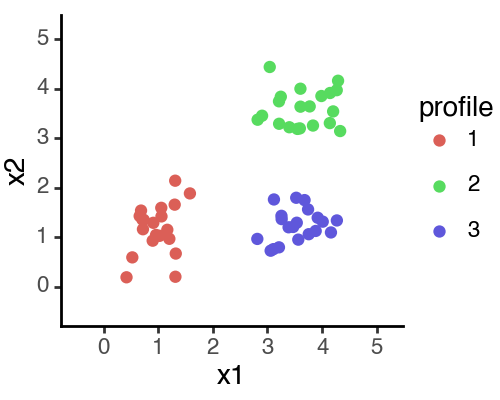

<Figure Size: (250 x 200)>

In [5]:
#true_lpa_plot.save(plot_path + '2-dim true profiles', dpi = 300)
true_lpa_plot

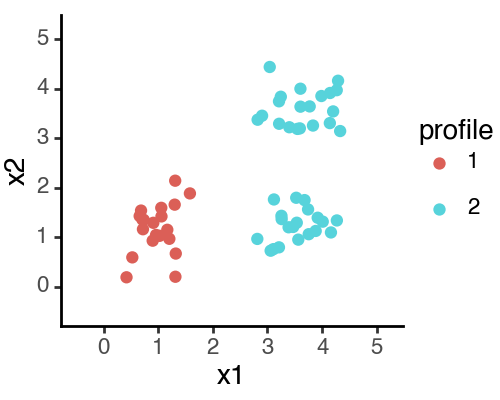

<Figure Size: (250 x 200)>

In [6]:
#small_lpa_plot.save(plot_path + '2-dim LPA with too few profiles', dpi = 300)
small_lpa_plot

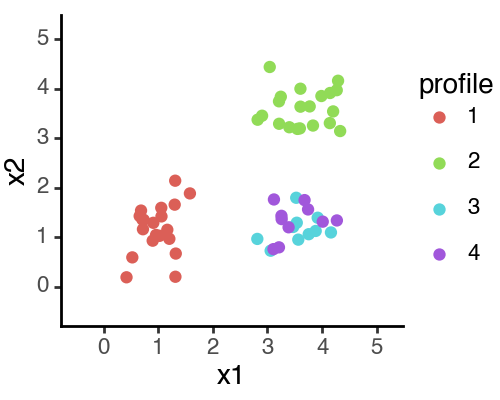

<Figure Size: (250 x 200)>

In [7]:
#large_lpa_plot.save(plot_path + '2-dim LPA with too many profiles', dpi = 300)
large_lpa_plot

In [ ]:
# first similarity figure
plot_a = p9.ggplot(data = pd.DataFrame({'$x_1$': [1, 4], '$x_2$': [1, 5]}),
                   mapping = p9.aes(x = '$x_1$', y = '$x_2$'))
plot_a += p9.geom_point()
plot_a += p9.geom_line(linetype = 'dashed')
plot_a += p9.annotate('text', x = 2, y = 0.7, 
                      label = '$\mu_1 = (\mu_{1,1}, \mu_{2,1})$',
                      size = font_size - 1)
plot_a += p9.annotate('text', x = 5.3, y = 5.4, 
                      label = '$\mu_2 = (\mu_{1,2}, \mu_{2,2})$',
                      size = font_size - 1)
plot_a += p9.annotate('text', x = 4.65, y = 2.5, 
                      label = '$d = \sqrt{\sum_{j=1}^m \\xi_j (\mu_{j,1} - \mu_{j,2})^2}$',
                      size = font_size - 1)
plot_a += p9.theme_classic(base_size = font_size)
plot_a += p9.scale_x_continuous(limits = [0, 7], breaks = [], labels = [])
plot_a += p9.scale_y_continuous(limits = [0, 7], breaks = [], labels = [])
plot_a += p9.theme(figure_size = [2.5, 2.5])
plot_a.save(plot_path + 'similarity_figure_a', dpi = 300)
plot_a

In [ ]:
# second similarity figure
plot_b = p9.ggplot(data = pd.DataFrame({'d': np.arange(0, 15, 0.1), 'similarity': np.exp(-0.5*np.arange(0, 15, 0.1))}),
                   mapping = p9.aes(x = 'd', y = 'similarity'))
plot_b += p9.geom_line()
plot_b += p9.theme_classic(base_size = font_size)
plot_b += p9.theme(figure_size = [2.5, 2.5])
plot_b.save(plot_path + 'similarity_figure_b', dpi = 300)
plot_b